### ceRNA GWAS association analysis

In [3]:
%load_ext autoreload

import sys
sys.path.append('../../../../1_GREA')
sys.path.append('../../')

from cernatax.cernatax import CERNATAX

# initialize CERNATAX object
cernatax = CERNATAX()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
%autoreload

import pandas as pd
# read the SCZ SNP data, download from SCZ study
snp_data = pd.read_csv('../../demo/CLOZUK_PGC2noclo.METAL.assoc.dosage.fix', sep=' ')
print('snp_data\n', snp_data.head())
# filter snp data with p value and Odds Ratio
sig_snp_data = snp_data[(snp_data['P'] < 0.05) & (snp_data['OR'] > 1)]
print('sig_snp_data\n', sig_snp_data.head())

# read the GWAS gene location file
# !!! Please build this file by your own, 
# collect the genome poistion of your interested ceRNA list
gene_df = pd.read_excel('../../demo/GWAS-SNP-20250510.xlsx')
gene_df.index = gene_df['gene']
gene_df.start = gene_df.start.astype(int)
gene_df.end = gene_df.end.astype(int)
gene_df['gene'] = gene_df['gene'].apply(lambda x: x.strip())
print('gene_df\n', gene_df.head())

# screen the SNPs which hit the interested ceRNA list
GWAS_gene_snp_df, sub_gene_df, gene_count = cernatax.screen_GWAS_SNP(sig_snp_data, gene_df)
GWAS_gene_snp_df.to_csv('../../demo_out/GWAS_gene_snp.csv')
print('GWAS_gene_snp_df\n', GWAS_gene_snp_df.head())
sub_gene_df.to_csv('../../demo_out/GWAS_gene_count.csv')  
print('sub_gene_df\n', sub_gene_df.head())
print(sub_gene_df[sub_gene_df['gene'].isin(['ARHGAP8','THUMPD3-AS1','has-miR-485'])])


snp_data
           SNP  CHR         BP A1 A2       OR        SE       P DIRECTION
0  rs10000000    4   40088896  A  T  1.00170  0.021973  0.9394        +-
1  rs10000003    4   57561647  A  G  0.99938  0.010505  0.9528        +-
2  rs10000005    4   85161558  G  A  1.01050  0.009810  0.2889        -+
3  rs10000006    4  108826383  T  C  0.96796  0.026254  0.2149        +-
4  rs10000008    4  172776204  C  T  0.93949  0.044015  0.1561        +-
sig_snp_data
            SNP  CHR         BP A1 A2      OR        SE       P DIRECTION
31  rs10000044    4   32640754  A  G  1.0348  0.012949  0.0082        ++
40  rs10000065    4  190051252  C  G  1.0305  0.013544  0.0264        -+
56  rs10000091    4   12984967  T  C  1.0201  0.009989  0.0462        ++
66   rs1000010    3   11604119  A  G  1.0302  0.010082  0.0031        ++
72  rs10000121    4  157574035  A  G  1.0208  0.009601  0.0318        ++
gene_df
                    gene               id chr      start        end  \
gene                 

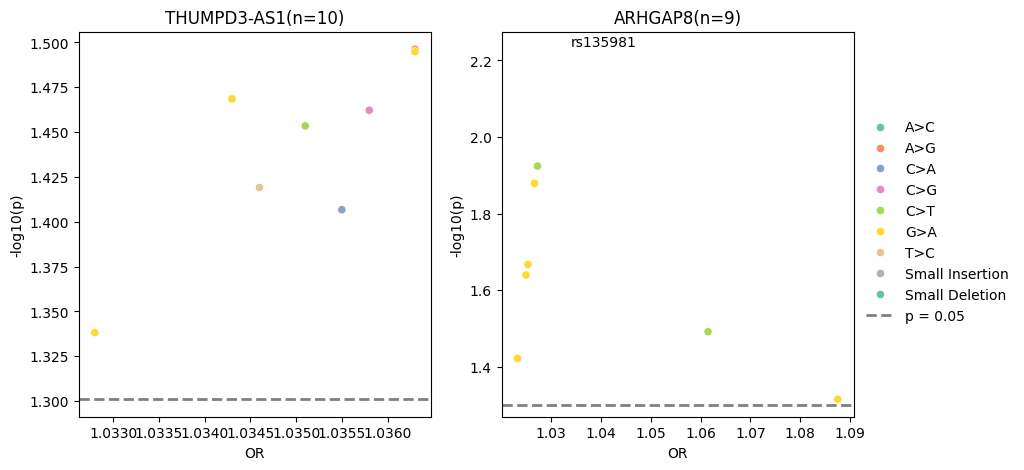

In [67]:
%autoreload
import numpy as np
genes = list(gene_count.keys())
for gene in genes:
    gene_count[gene.strip()] = gene_count[gene]
# modify headers and texts in GWAS_gene_snp_df for visualization
targets = ['ARHGAP8','THUMPD3-AS1','has-miR-485']
GWAS_gene_snp_df['-log10(p)'] = -np.log10(GWAS_gene_snp_df['P'])
GWAS_gene_snp_df['Gene'] = GWAS_gene_snp_df['gene'].apply(lambda gs: ''.join([g.strip() if g.strip() in targets else '' for g in gs]))
GWAS_gene_snp_df = GWAS_gene_snp_df[GWAS_gene_snp_df['Gene'] != '']
GWAS_gene_snp_df['type'] = GWAS_gene_snp_df['A1'].str.upper() + '>' + GWAS_gene_snp_df['A2'].str.upper()
mymap = {'T>TATGA': 'Small Insertion', 'G>GCT': 'Small Insertion', 
         'CTT>C': 'Small Deletion', 'CTGGTACAGAGCCCAG>C': 'Small Deletion',
         'A>AC': 'Small Insertion'}
GWAS_gene_snp_df['SNP Type'] = GWAS_gene_snp_df['type'].apply(lambda x: mymap.get(x, x))
GWAS_gene_snp_df = GWAS_gene_snp_df.sort_values(by=['SNP Type'])


# set interested ceRNAs to plot
ceRNA_list = ['THUMPD3-AS1', 'ARHGAP8']
# set the output file
out_fn = '../../demo_out/GWAS.pdf'
# plot the gene GWAS SNP hits
cernatax.plot_gene_GWAS_SNP(GWAS_gene_snp_df, gene_count, ceRNA_list, out_fn)